# Домашнее задание "Линейная алгебра. Матрицы".

### Уровень 0:

 - Создайте матрицу 3 на 3, заполненную числами от 1 до 9
 - Прибавьте к ней матрицу с единицами на диагонале
 - Умножьте полученную матрицу на вектор (1, 2, 3)
 - Посчитайте обратную матрицу к полученной в результате прибавления матрице

### Уровень 1:

Дан объект в 2d пространстве:



```
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
```


При помощи матричных операций выполните:
- Уменьшить объект в два раза
- Повернуть на 130 градусов
- Отразить объект относительно прямой y=x
- Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)



In [80]:
#Level 0
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A1 = A + np.eye(3)
print('A1:')
print(A1)

A1:
[[ 2.  2.  3.]
 [ 4.  6.  6.]
 [ 7.  8. 10.]]


In [81]:
v = np.array([[1], [2], [3]])
A1v = A1 @ v
print('A1v:')
print(A1v)

A1v:
[[15.]
 [34.]
 [53.]]


In [82]:
A1i = np.linalg.inv(A1)
print('A1i:')
print(A1i)
print('Double check if the inverse matrix is correctly calculated. A1 @ A1i:')
print(A1 @ A1i)

A1i:
[[-6.00000000e+00 -2.00000000e+00  3.00000000e+00]
 [-1.00000000e+00  5.00000000e-01  2.22044605e-17]
 [ 5.00000000e+00  1.00000000e+00 -2.00000000e+00]]
Double check if the inverse matrix is correctly calculated. A1 @ A1i:
[[ 1.00000000e+00 -2.22044605e-16  4.44089210e-16]
 [-1.77635684e-15  1.00000000e+00  8.88178420e-16]
 [-1.77635684e-15  4.44089210e-16  1.00000000e+00]]


In [83]:
#Level 1
import numpy as np
import matplotlib.pyplot as plt

def plot_object(arr: np.array, x_lim = [-200, 200], y_lim = [-200, 200]):
    x = arr[:, 0]
    y = arr[:, 1]
    plt.plot(x, y)
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.show()

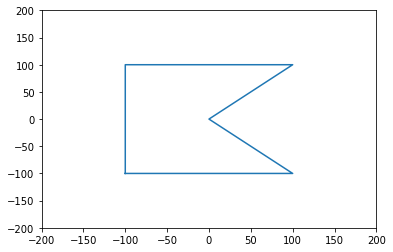

In [84]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
plot_object(A)

A_half_size:
[[-50. -50.   1.]
 [-50.  50.   1.]
 [ 50.  50.   1.]
 [  0.   0.   1.]
 [ 50. -50.   1.]
 [-50. -50.   1.]]


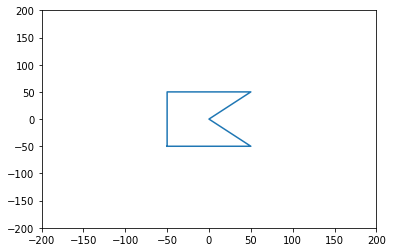

In [85]:
T_half_size = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]])
A_half_size = A @ T_half_size
print('A_half_size:')
print(A_half_size)
plot_object(A_half_size)

A_rotated:
[[ -12.32568334  140.88320528    1.        ]
 [ 140.88320528   12.32568334    1.        ]
 [  12.32568334 -140.88320528    1.        ]
 [   0.            0.            1.        ]
 [-140.88320528  -12.32568334    1.        ]
 [ -12.32568334  140.88320528    1.        ]]


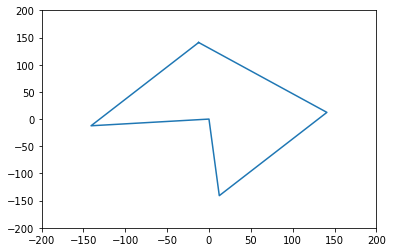

In [86]:
angle_rad = np.deg2rad(130)
T_rotation = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad), 0],
    [np.sin(angle_rad), np.cos(angle_rad), 0],
    [0, 0, 1]
])
A_rotated = A @ T_rotation
print('A_rotated:')
print(A_rotated)
plot_object(A_rotated)

A_reflected:
[[-100 -100    1]
 [ 100 -100    1]
 [ 100  100    1]
 [   0    0    1]
 [-100  100    1]
 [-100 -100    1]]


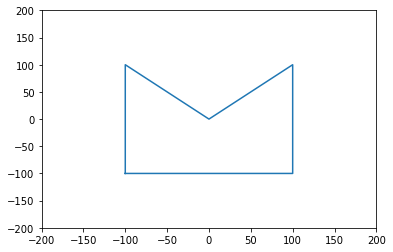

In [87]:
T_Householder = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])
A_reflected = A @ T_Householder
print('A_reflected:')
print(A_reflected)
plot_object(A_reflected)

A_transformed:
[[150. 180.   1.]
 [150. 420.   1.]
 [250. 420.   1.]
 [200. 300.   1.]
 [250. 180.   1.]
 [150. 180.   1.]]


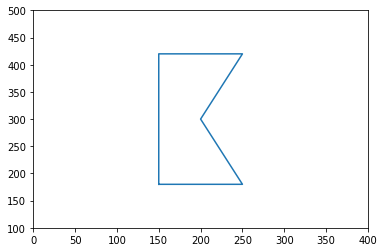

In [88]:
x_shift = 200
y_shift = 300
T_shift = np.array([
    [x_shift, y_shift, 0],
    [x_shift, y_shift, 0],
    [x_shift, y_shift, 0],
    [x_shift, y_shift, 0],
    [x_shift, y_shift, 0],
    [x_shift, y_shift, 0]
])
T_scale = np.array([
    [0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
])
A_transformed = A @ T_scale + T_shift
print('A_transformed:')
print(A_transformed)
plot_object(A_transformed, [-200 + x_shift, 200 + x_shift], [-200 + y_shift, 200 + y_shift])
